In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [157]:
data = pd.read_csv("data/train.csv")
data.head()

,Id,Sequence
0,3,"1,3,13,87,1053,28576,2141733,508147108,4021352..."
1,7,"1,2,1,5,5,1,11,16,7,1,23,44,30,9,1,47,112,104,..."
2,8,"1,2,4,5,8,10,16,20,32,40,64,80,128,160,256,320..."
3,11,"1,8,25,83,274,2275,132224,1060067,3312425,1099..."
4,13,"1,111,12211,1343211,147753211,16252853211,1787..."


In [158]:
data.shape

(113845, 2)

In [159]:
data['NumSequence'] = data['Sequence'].str.split(',')
data['LastNum'] = [seq[-1] for seq in data['NumSequence']]
data['TrainSeq'] = [seq[:-1] for seq in data['NumSequence']]
data['TrainSeq'] = data['TrainSeq'].str.join(',')
data["TrainSeqLength"] = data["TrainSeq"].str.len()
data.head()

,Id,Sequence,NumSequence,LastNum,TrainSeq,TrainSeqLength
0,3,"1,3,13,87,1053,28576,2141733,508147108,4021352...","[1, 3, 13, 87, 1053, 28576, 2141733, 508147108...",11474377948948020660089085281068730,"1,3,13,87,1053,28576,2141733,508147108,4021352...",143
1,7,"1,2,1,5,5,1,11,16,7,1,23,44,30,9,1,47,112,104,...","[1, 2, 1, 5, 5, 1, 11, 16, 7, 1, 23, 44, 30, 9...",7424,"1,2,1,5,5,1,11,16,7,1,23,44,30,9,1,47,112,104,...",188
2,8,"1,2,4,5,8,10,16,20,32,40,64,80,128,160,256,320...","[1, 2, 4, 5, 8, 10, 16, 20, 32, 40, 64, 80, 12...",2097152,"1,2,4,5,8,10,16,20,32,40,64,80,128,160,256,320...",189
3,11,"1,8,25,83,274,2275,132224,1060067,3312425,1099...","[1, 8, 25, 83, 274, 2275, 132224, 1060067, 331...",18610239435360217,"1,8,25,83,274,2275,132224,1060067,3312425,1099...",167
4,13,"1,111,12211,1343211,147753211,16252853211,1787...","[1, 111, 12211, 1343211, 147753211, 1625285321...",28792920887348623853211,"1,111,12211,1343211,147753211,16252853211,1787...",131


In [160]:
data["TrainSeqLength"].value_counts()

207    4080
195    3923
201    3132
203    2935
202    2841
       ... 
596       1
435       1
469       1
789       1
447       1
Name: TrainSeqLength, Length: 475, dtype: int64

<AxesSubplot:>

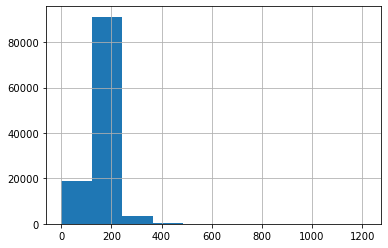

In [161]:
data["TrainSeqLength"].hist()

In [162]:
data = data[data["TrainSeqLength"] == 207]
data

,Id,Sequence,NumSequence,LastNum,TrainSeq,TrainSeqLength
28,63,"1,1,9,1,25,11,1,49,31,43,1,81,61,247,85,1,121,...","[1, 1, 9, 1, 25, 11, 1, 49, 31, 43, 1, 81, 61,...",657871,"1,1,9,1,25,11,1,49,31,43,1,81,61,247,85,1,121,...",207
88,177,"1,0,0,1,0,0,1,0,0,1,0,0,2,0,0,2,0,0,2,0,0,2,0,...","[1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, ...",0,"1,0,0,1,0,0,1,0,0,1,0,0,2,0,0,2,0,0,2,0,0,2,0,...",207
114,224,"1,1,1,2,1,1,2,1,1,2,2,2,2,2,3,2,3,3,2,2,3,1,1,...","[1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 3, ...",3,"1,1,1,2,1,1,2,1,1,2,2,2,2,2,3,2,3,3,2,2,3,1,1,...",207
137,268,"0,1,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,...","[0, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, ...",9,"0,1,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,...",207
175,327,"3,8,4,5,7,1,7,5,0,5,0,4,9,4,8,7,0,3,1,4,7,9,4,...","[3, 8, 4, 5, 7, 1, 7, 5, 0, 5, 0, 4, 9, 4, 8, ...",7,"3,8,4,5,7,1,7,5,0,5,0,4,9,4,8,7,0,3,1,4,7,9,4,...",207
...,...,...,...,...,...,...
113770,227549,"1,1,1,1,2,1,1,3,3,1,1,4,6,4,1,1,6,10,10,6,1,1,...","[1, 1, 1, 1, 2, 1, 1, 3, 3, 1, 1, 4, 6, 4, 1, ...",21259,"1,1,1,1,2,1,1,3,3,1,1,4,6,4,1,1,6,10,10,6,1,1,...",207
113778,227564,"2,7,6,8,6,7,8,2,8,2,9,8,7,3,2,1,5,3,2,4,9,5,3,...","[2, 7, 6, 8, 6, 7, 8, 2, 8, 2, 9, 8, 7, 3, 2, ...",6,"2,7,6,8,6,7,8,2,8,2,9,8,7,3,2,1,5,3,2,4,9,5,3,...",207
113810,227621,"1,1,1,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...","[1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, ...",5,"1,1,1,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...",207
113815,227632,"1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...","[1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2,"1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",207


In [163]:
data = data[data['LastNum'].str.len() < 10]
data.shape

(3876, 6)

In [164]:
data = data[['TrainSeq', 'LastNum']]
data

,TrainSeq,LastNum
28,"1,1,9,1,25,11,1,49,31,43,1,81,61,247,85,1,121,...",657871
88,"1,0,0,1,0,0,1,0,0,1,0,0,2,0,0,2,0,0,2,0,0,2,0,...",0
114,"1,1,1,2,1,1,2,1,1,2,2,2,2,2,3,2,3,3,2,2,3,1,1,...",3
137,"0,1,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,...",9
175,"3,8,4,5,7,1,7,5,0,5,0,4,9,4,8,7,0,3,1,4,7,9,4,...",7
...,...,...
113770,"1,1,1,1,2,1,1,3,3,1,1,4,6,4,1,1,6,10,10,6,1,1,...",21259
113778,"2,7,6,8,6,7,8,2,8,2,9,8,7,3,2,1,5,3,2,4,9,5,3,...",6
113810,"1,1,1,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...",5
113815,"1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",2


In [165]:
data['LastNum'] = data['LastNum'].str.zfill(9)

In [166]:
data.to_csv("preprocessed.csv")